# STUDENT NUMBERS
## 1886648
## 1851234 
## 1669326

### Run and the graphs that come out will be as required along with a pandas dataframe to easily read the results.

[[20. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1.]]
[0.63095734 0.64643716 0.66229676 0.67854546 0.6951928  0.71224856
 0.72972276 0.74762568 0.76596782 0.78475997 0.80401316 0.82373871
 0.8439482  0.8646535  0.88586679 0.90760052 0.92986747 0.9526807
 0.97605364 1.        ]


,discount,iterations
0,0.630957,9.0
1,0.646437,9.0
2,0.662297,10.0
3,0.678545,10.0
4,0.695193,11.0
5,0.712249,11.0
6,0.729723,12.0
7,0.747626,13.0
8,0.765968,14.0
9,0.784760,15.0


Text(0, 0.5, 'Iterations to Converge')

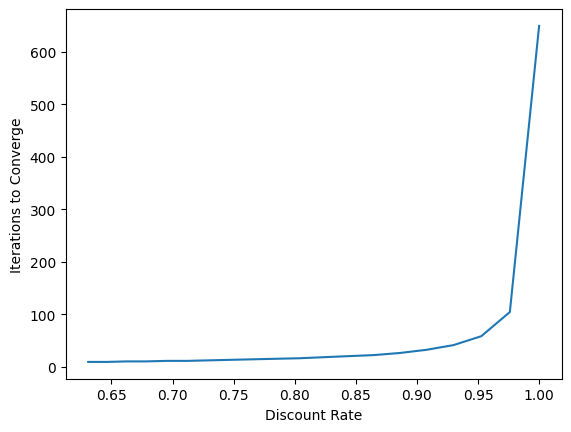

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

# STUDENT NUMBERS
# 1886648
# 1851234 
# 1669326

plt.rcdefaults()

# class of grid world
class GridWorld():

    def __init__ (self, rows, cols):
        # map to denote space
        self.map = np.zeros((rows, cols))
        self.rows = rows
        self.cols = cols
        # define the value map
        self.valueMap = np.zeros((rows,cols))
        # denote an obstacle with a sentinel value
        self.obstacle = -9

    # Returns the grid and it's dimensions
    def getEnvironmentMap(self):
        return self.map, self.rows, self.cols

def getNextStates(gridMap,i,j):
    
    n = gridMap.shape[0]
    next = []
    
    acts = ((i-1,j),(i+1,j),(i,j+1),(i,j-1))
    
    for k in range(0,4):
        a = acts[k]
        if a[0] >= n or a[0] < 0 or a[1] >= n or a[1] < 0:
            next.append((i,j))
        else:
            next.append(a)
    
    return next

def getRewards(rewards,states):
    re = []
    
    for i in range(0,len(states)):
        s = states[i]
        re.append(rewards[s[0],s[1]])
        
    return re

def getValue(V,states):
    val = []

    for i in range(0,len(states)):
        s = states[i]
        val.append(V[s[0],s[1]])
        
    
    return val
    

def policyEvaluation(gridWorld,rewards,theta,discount):
    gridMap , row , col = gridWorld.getEnvironmentMap()
    V = np.zeros((row,col))
    t = 0
    
    while True:
        delta = 0
        #print(t)
        t += 1
        for i in range(0,row):
            for j in range(0,col):
                # print(i, "\n" ,j)
                val =  V[i,j]
                #print(val)
            
                pi = 0.25
                next_s = getNextStates(gridMap,i,j)
                rew_s = getRewards(rewards,next_s)
               
                # print("next s  \n", next_s)
                # print("reward\n", rew_s)
                # print("v" , getValue(V,next_s))
                # print(np.multiply(,getValue(V,next_s)))
                # print(np.sum(pi*(rew_s + np.multiply(discount,getValue(V,next_s)))))
                
                if (i,j) == (0,0):
                    V[i,j] = 0
                else:
                    V[i,j] = np.sum(pi*(rew_s + np.multiply(discount,getValue(V,next_s))))
                #print(V[i,j])
                
                vDiff = abs(val-V[i,j])
                # print(vDiff)
                # print(delta)
                delta = max(delta,vDiff)
                #print(delta)
      
        if delta < theta:
            break;
    
    return V,t

# The creation of the grid world alongside the agents.
gridWorld = GridWorld(7,7)
goal = np.array([0,0])

rewards = np.ones((7,7))*-1
rewards[0,0] = 20
print(rewards)

theta = 0.01
discount = 0.5

matrix,t = policyEvaluation(gridWorld,rewards,theta,discount)
#print(matrix)
#sns.heatmap(matrix)

iterDF = pd.DataFrame(columns= ["discount", "iterations"])

discounts = np.logspace(- 0.2, 0, num=20)
print(discounts)
for d in discounts:
    #if d == 1:
    #    break;
    matrix,t = policyEvaluation(gridWorld,rewards,theta,d)
    iterDF = iterDF.append({"discount" : d, "iterations" : t}, ignore_index = True)
    #sns.heatmap(matrix)
    #plt.show()
    #print(d)
    #print(matrix)
    #print(t)
 
display(iterDF)
plt.plot('discount', 'iterations', data=iterDF)
plt.xlabel("Discount Rate")
plt.ylabel("Iterations to Converge")